In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from objects import image

1. Вивести початкове кольорове зображення та вектор, що буде містити: розміри зображення в пікселях та кількість основних каналів кольорів, що використовуються.

Original image shape and color channels: (408, 652, 3)


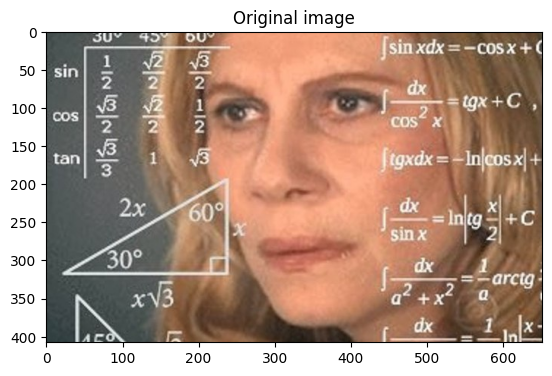

In [39]:
# Load the image and get the vector consisting dimensions and color channels number
image_raw = plt.imread(image)
print("Original image shape and color channels:", image_raw.shape)

# Display the original image
plt.imshow(image_raw)
plt.title("Original image")
plt.show()

2. Перетворити зображення в чорно-біле та вивести розмір зображення і кількість каналів кольорів.

Black & white image shape and color channels: (408, 652, 1)


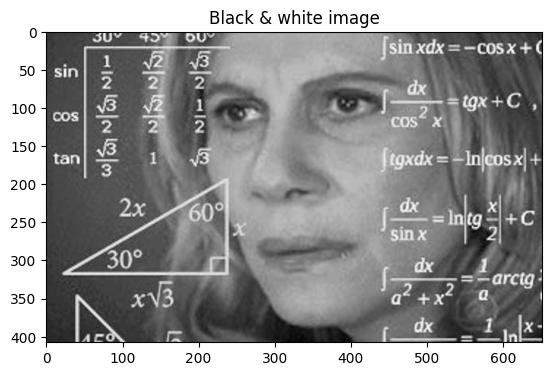

In [40]:
# Convert the image to black & white
image_sum = image_raw.sum(axis=2)
image_bw = image_sum / image_sum.max()
image_raw_shape = (*image_bw.shape, round(image_bw.max()))
print("Black & white image shape and color channels:", image_raw_shape)

# Display the black & white image
plt.imshow(image_bw, cmap='gray')
plt.title("Black & white image")
plt.show()

3. Застосувати PCA для матриці компонентів image_bw. Вивести cumulative variance та знайти кількість компонент, які необхідні для покриття 95% of the variance.

In [41]:
# Flatten each row of the image
image_rows = image_bw.reshape(image_bw.shape[0], -1)
print("Image reshaped to rows shape:", image_rows.shape)

# Scale the data
scaler = StandardScaler()
image_rows_scaled = scaler.fit_transform(image_rows)
print("Scaled rows shape:", image_rows_scaled.shape)

# Apply PCA
pca = PCA()
pca.fit(image_rows_scaled)

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
print("Cumulative variance:")
print(cumulative_variance)

# Number of components for 95% covering of variance
num_components = np.argmax(cumulative_variance >= 95) + 1
print(f'Number of components to cover 95% of the variance: {num_components}')

Image reshaped to rows shape: (408, 652)
Scaled rows shape: (408, 652)
Cumulative variance:
[ 26.034874  35.932446  44.466003  50.656563  55.45915   59.137398
  62.272625  64.83092   67.02237   69.03306   70.642845  72.11967
  73.45618   74.74865   75.92318   76.994934  78.00725   78.9543
  79.85801   80.697784  81.50326   82.228676  82.95036   83.63028
  84.290764  84.91431   85.506996  86.06626   86.60909   87.126335
  87.61468   88.09324   88.54617   88.98551   89.40372   89.80186
  90.18863   90.56261   90.92564   91.26923   91.59806   91.9113
  92.21353   92.502785  92.78337   93.04567   93.30037   93.54584
  93.779205  93.996605  94.211235  94.41541   94.61559   94.80969
  94.999084  95.179375  95.35606   95.52623   95.69056   95.844505
  95.99798   96.145386  96.28964   96.42991   96.5661    96.69846
  96.81847   96.93544   97.048485  97.16      97.267685  97.37204
  97.47051   97.56642   97.65842   97.74641   97.828316  97.90483
  97.97966   98.05042   98.119446  98.186646  98.

4. Вивести графік відповідного процесу.

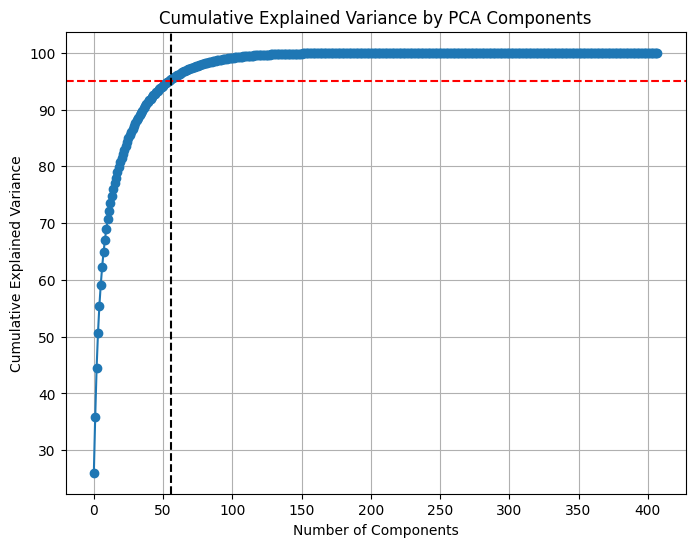

In [43]:
# Show the cumulative variance plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=95, color='r', linestyle='--')  # Add a horizontal line for 95% variance
plt.axvline(x=num_components, color='k', linestyle='--')  # Add a vertical line for the number of components
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

5. Провести реконструкцію чорно-білого зображення, використовуючи обмежену кількість компонентів, знайдену в попередньому кроці. Вивести отримане зображення.

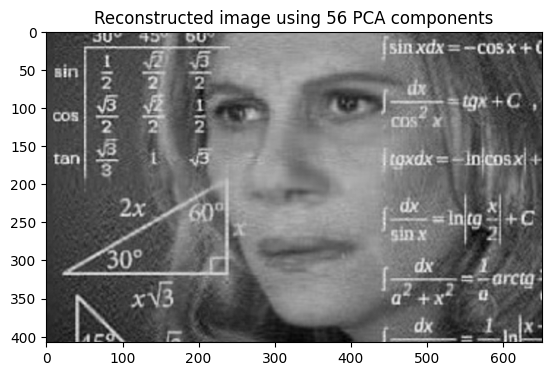

In [44]:
# Transform and inverse transform the image using the limited number of components
pca = PCA(n_components=num_components)
image_rows_reduced = pca.fit_transform(image_rows_scaled)
image_rows_reconstructed = pca.inverse_transform(image_rows_reduced)

# Inverse scaling
image_rows_reconstructed = scaler.inverse_transform(image_rows_reconstructed)

# Reshape the reconstructed rows back to the original image shape
image_reconstructed = image_rows_reconstructed.reshape(image_bw.shape)

# Display the reconstructed image
plt.imshow(image_reconstructed, cmap='gray')
plt.title(f'Reconstructed image using {num_components} PCA components')
plt.show()

5. Проведіть реконструкцію зображення для різної кількості компонент та виведіть відповідні результати. 

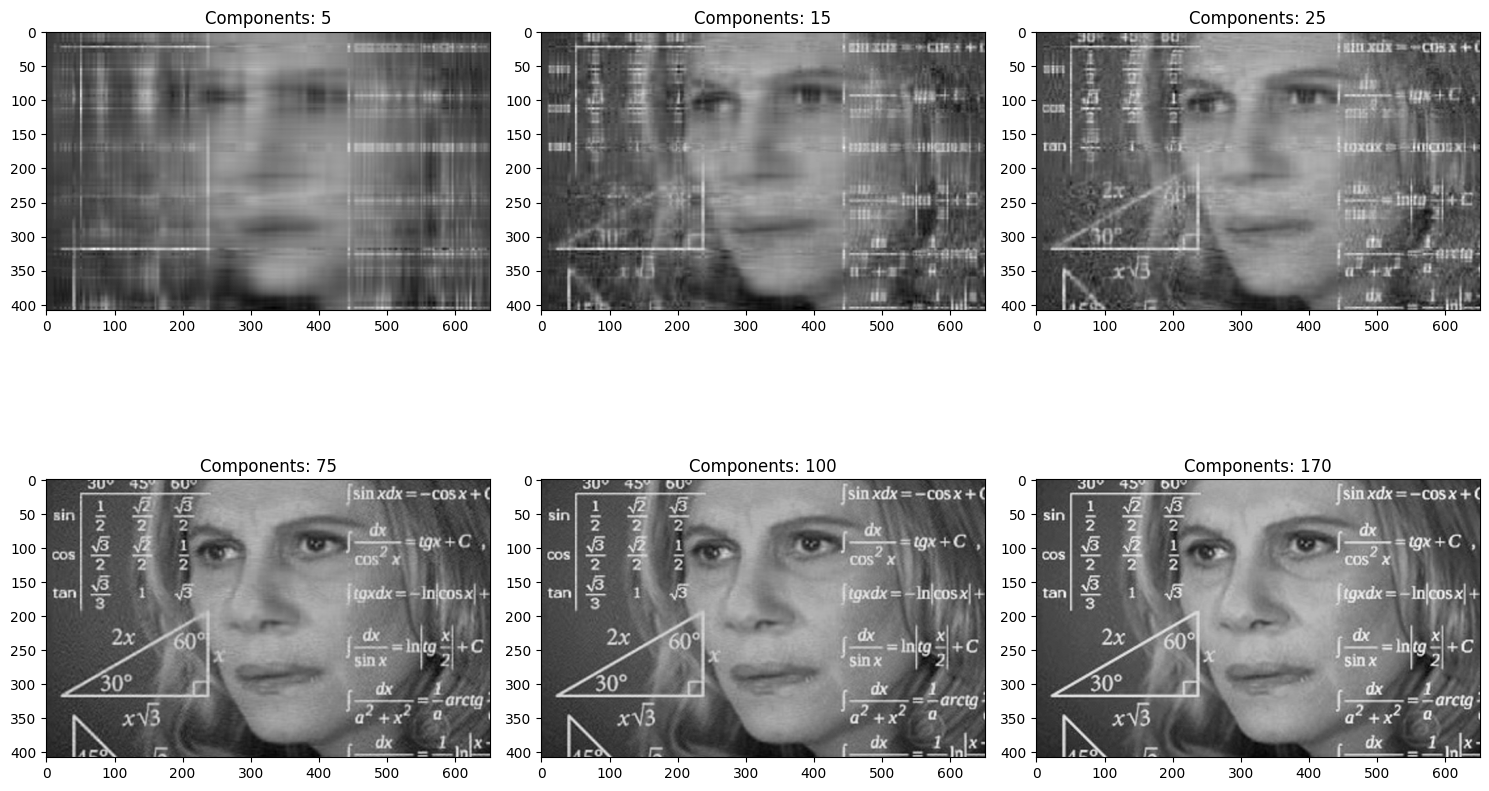

In [45]:
# Components to visualize
components_list = [5, 15, 25, 75, 100, 170]

# Plot reconstructed images for different numbers of components
plt.figure(figsize=(15, 10))
for i, n_components in enumerate(components_list):
    pca = PCA(n_components=n_components)
    image_rows_reduced = pca.fit_transform(image_rows_scaled)
    image_rows_reconstructed = pca.inverse_transform(image_rows_reduced)
    image_rows_reconstructed = scaler.inverse_transform(image_rows_reconstructed)
    image_reconstructed = image_rows_reconstructed.reshape(image_bw.shape)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'Components: {n_components}')

plt.tight_layout()
plt.show()